In [1]:
# PCA and KMeans: A Case Study with Airbnb Listings

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Load the dataframe from the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/airbnb.csv')

In [6]:
df

,listing_id,host_id,host_since_datekey,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood,city,latitude,longitude,property_type,accommodates,bedrooms,price,review_scores_rating,instant_bookable,listing_size_sqft
0,46096773,349135088,20200608,NaN,0.26,f,5.0,Enclos-St-Laurent,Paris,48.879289,2.354539,Room in hotel,0,NaN,0.0,18,f,130.565530
1,44692017,361914459,20200812,NaN,0.34,f,0.0,Palais-Bourbon,Paris,48.854270,2.307810,Room in boutique hotel,0,NaN,0.0,88,f,286.832585
2,45841514,371644174,20201012,NaN,0.51,f,0.0,Murray Hill,New York,40.750920,-73.980050,Room in boutique hotel,0,NaN,0.0,75,f,294.833871
3,42228997,314197504,20191203,NaN,0.33,f,0.0,Lower East Side,New York,40.721860,-73.992780,Room in hotel,4,NaN,0.0,13,f,403.228927
4,48115028,387570084,20200429,NaN,0.64,f,0.0,Murray Hill,New York,40.750920,-73.980050,Room in boutique hotel,0,NaN,0.0,92,f,342.782170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,48109312,387561857,20200526,1.0,0.47,f,0.0,Fremont,Sydney,-33.889040,151.270220,NaN,6,3.0,NaN,96,f,NaN
7206,6569075,235767408,20190110,NaN,0.61,f,19.0,Fremont,Sydney,-33.893720,151.216610,NaN,2,1.0,NaN,96,t,NaN
7207,7736378,295593456,20190917,1.0,0.34,t,2.0,Fremont,Sydney,-33.880730,151.213870,NaN,2,1.0,NaN,96,t,NaN
7208,7699700,293573248,20190910,1.0,0.91,f,0.0,Fremont,Sydney,-33.875050,151.221260,NaN,2,1.0,NaN,98,t,NaN


In [9]:
# Fill missing values with the mean of the column
df_filled = df.fillna(df.mean(),inplace=True)

TypeError: can only concatenate str (not "int") to str

In [10]:
# Fill missing values with the mean of the column
df_filled = df.dropna()

# Convert categorical columns to numeric using label encoding
# Initialize label encoder
label_encoder = LabelEncoder()

# Columns to label encode
label_encode_columns = ['host_is_superhost', 'neighbourhood', 'property_type', 'instant_bookable']

# Apply label encoding to each column
for column in label_encode_columns:
    df_filled[column] = label_encoder.fit_transform(df_filled[column])

# Apply one-hot encoding to 'city' using get_dummies
df_filled = pd.get_dummies(df_filled, columns=['city'])

# Redefine and refit the scaler to the current dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filled)

C:\Users\sudwa\AppData\Local\Temp\ipykernel_4928\2031982148.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled[column] = label_encoder.fit_transform(df_filled[column])
C:\Users\sudwa\AppData\Local\Temp\ipykernel_4928\2031982148.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled[column] = label_encoder.fit_transform(df_filled[column])
C:\Users\sudwa\AppData\Local\Temp\ipykernel_4928\2031982148.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [11]:
# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_features)

In [12]:
# Apply KMeans clustering on the PCA result
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=4, random_state=42)

In [13]:
# Get the PCA components (loadings)
pca_components = pca.components_

In [16]:
# Inverse transform the cluster centers from PCA space back to the original feature space
original_space_centroids = scaler.inverse_transform(pca.inverse_transform(kmeans_pca.cluster_centers_))

# Create a new DataFrame for the inverse transformed cluster centers with column names
centroids_df = pd.DataFrame(original_space_centroids, columns=df_filled.columns)

# Calculate the mean of the original data for comparison
original_means = df_filled.mean(axis=0)

# Prepare the PCA loadings DataFrame
pca_loadings_df = pd.DataFrame(pca_components, columns=df_filled.columns, index=[f'PC{i+1}' for i in range(3)])

In [17]:
pca_loadings_df

,listing_id,host_id,host_since_datekey,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood,latitude,longitude,...,accommodates,bedrooms,price,review_scores_rating,instant_bookable,listing_size_sqft,city_New York,city_Paris,city_Rome,city_Sydney
PC1,-0.021840,-0.020838,-0.041753,-0.024016,0.016223,0.021329,-0.025993,0.189383,-0.462214,0.485547,...,0.192698,0.206989,0.185135,0.000509,-0.015301,0.190708,-0.344584,-0.071770,-0.041541,0.469241
PC2,-0.496317,-0.525733,-0.491066,-0.042634,-0.151677,0.139966,-0.052017,0.048200,0.139558,-0.002565,...,0.069654,0.030030,0.006255,-0.090154,0.068308,0.001373,-0.195725,0.118446,0.278804,-0.129528
PC3,0.055538,0.062153,0.074002,0.028659,-0.037979,0.077715,0.063571,-0.061567,0.208832,-0.207955,...,0.444125,0.442650,0.422396,0.039240,-0.080561,0.429274,0.133141,0.082546,-0.003459,-0.207784


In [21]:
# Append the mean of the original data to the centroids for comparison
centroids_comparison_df = centroids_df.append(original_means, ignore_index=True)

# Store the PCA loadings and centroids comparison DataFrame for further analysis
pca_loadings_df.to_csv('/mnt/data/pca_loadings.csv', index=True)
centroids_comparison_df.to_csv('/mnt/data/centroids_comparison.csv', index=False)

pca_loadings_df, centroids_comparison_df.head()  # Displaying the PCA loadings and the first few rows of the centroids comparison DataFrame

AttributeError: 'DataFrame' object has no attribute 'append'

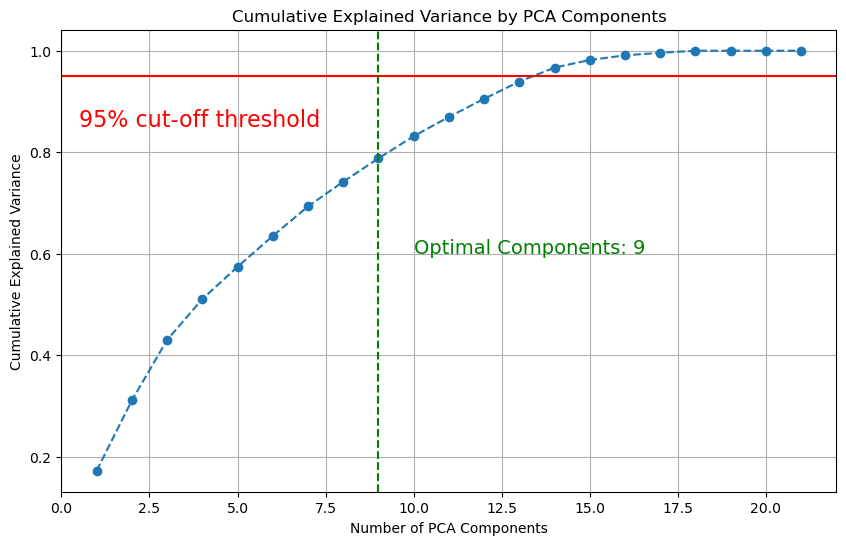

9

In [22]:
# Step 1: Determine the Optimal Number of PCA Components
# Fit PCA to the data without reducing dimensions and compute the explained variance ratio
pca_full = PCA()
pca_full.fit(scaled_features)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance ratio to find the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% variance line for reference
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# Determine the number of components that explain at least 95% of the variance
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance >= 0.95]) + 1

# Highlight the optimal number of components on the plot
plt.axvline(x=optimal_num_components, color='g', linestyle='--')
plt.text(optimal_num_components + 1, 0.6, f'Optimal Components: {optimal_num_components}', color = 'green', fontsize=14)

plt.show()

# Returning the optimal number of components
optimal_num_components

In [23]:
# Step 2: Redo PCA with 9 Components
# Redo PCA with 9 components
pca_9 = PCA(n_components=9)
pca_result_9 = pca_9.fit_transform(scaled_features)

# Get the PCA loadings for 9 components
pca_components_9 = pca_9.components_

# Analyze the PCA loadings to determine which features contribute most to each of the 9 principal components
# We will look at the absolute values of the loadings to assess their contribution
pca_loadings_analysis_9 = pd.DataFrame(
    pca_components_9, 
    columns=df_filled.columns, 
    index=[f'PC{i+1}' for i in range(9)]
).abs().T  # Transpose to have features as rows

# Sorting the loadings for each component to see the top contributing features
top_features_per_pc_9 = pca_loadings_analysis_9.apply(lambda s: s.abs().nlargest(5).index.tolist(), axis=0)

top_features_per_pc_9

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,longitude,host_id,accommodates,host_acceptance_rate,city_Paris,city_Rome,host_response_rate,host_total_listings_count,host_total_listings_count
1,city_Sydney,listing_id,bedrooms,city_New York,price,instant_bookable,host_is_superhost,review_scores_rating,neighbourhood
2,latitude,host_since_datekey,listing_size_sqft,city_Rome,listing_size_sqft,city_Paris,review_scores_rating,instant_bookable,review_scores_rating
3,city_New York,city_Rome,price,property_type,host_is_superhost,host_total_listings_count,instant_bookable,host_is_superhost,instant_bookable
4,bedrooms,city_New York,property_type,city_Paris,property_type,property_type,neighbourhood,city_Rome,property_type


In [24]:
# Display the actual loadings for the top 5 features for each of the 9 principal components
# We will extract the top 5 features based on the absolute values of the loadings and display their actual loadings
import numpy as np
# Function to get top n features for each principal component with their loadings
def get_top_features_loadings(pca_loadings, n_features):
    top_features = {}
    for i in range(pca_loadings.shape[0]):
        # Get the index of the n largest absolute values in the i-th principal component
        top_indices = np.argsort(np.abs(pca_loadings[i]))[-n_features:]
        # Create a dictionary of the top features and their loadings for the i-th principal component
        top_features[f'PC{i+1}'] = {df_filled.columns[j]: pca_loadings[i][j] for j in top_indices}
    return top_features

# Get the top 5 features and their loadings for each of the 9 principal components
top_features_loadings_9 = get_top_features_loadings(pca_components_9, 5)
top_features_loadings_9_df = pd.DataFrame(top_features_loadings_9).T

top_features_loadings_9_df

,bedrooms,city_New York,latitude,city_Sydney,longitude,city_Rome,host_since_datekey,listing_id,host_id,property_type,...,listing_size_sqft,accommodates,city_Paris,host_acceptance_rate,host_is_superhost,host_total_listings_count,instant_bookable,neighbourhood,review_scores_rating,host_response_rate
PC1,0.207066,-0.344633,-0.462192,0.469227,0.485556,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC2,NaN,-0.195876,NaN,NaN,NaN,0.278725,-0.490987,-0.49632,-0.525683,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC3,0.442175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.231258,...,0.429429,0.443788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC4,NaN,0.394436,NaN,NaN,NaN,-0.337975,NaN,NaN,NaN,0.325606,...,NaN,NaN,-0.294428,0.425901,NaN,NaN,NaN,NaN,NaN,NaN
PC5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.268007,...,0.331744,NaN,0.514846,NaN,-0.274368,NaN,NaN,NaN,NaN,NaN
PC6,NaN,NaN,NaN,NaN,NaN,0.494836,NaN,NaN,NaN,0.269520,...,NaN,NaN,-0.446471,NaN,NaN,0.274992,0.479802,NaN,NaN,NaN
PC7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.537447,NaN,-0.281156,0.198125,-0.357947,-0.606485
PC8,NaN,NaN,NaN,NaN,NaN,-0.212655,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.216861,0.668207,0.246099,NaN,-0.396973,NaN
PC9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.199881,...,NaN,NaN,NaN,NaN,NaN,0.561087,-0.418184,0.422428,0.418654,NaN
